# regenerate the data for classification purposes

some serious modification required to suit the actual data.

create a class LS  plus crystal

generic network initial easier to construct

the later adding details to further separate events can be difficult due to uncertainty nature/weirdness to data.

adding the two part noise function, (for if loop too slow, figure out a way to use numpy)

# generate better noise ... this seem to confuses with signal

# Comparison with  reconstructed parameter and raw data signal. Classification of signal and background with different input

skipping the whole process of painstaking calculate the reconstructed parameter where fine tuning are required.\

signal and background(flat ones) are still easiliy misidentified.

#### figure out a way to mod original available data to prep more training data. probably can be done by adding noise

insert joke, CANDLE CANcer Distributed Learning Environment

# A CNN classifier for classifying background and signal

Using a generated set of MC data, an idealistic function wishing to compare to. 

Using this trained model and test it on an actual combined waveform in CANDLES.

An event classifier that does not rely on any reconstructed parameters. solely on the raw data / low level data information only.

Reduce the number of events needed to process to obatin the reconstructed parameters.



(10000, 4000)
(10000, 4000)
(10000, 4000)


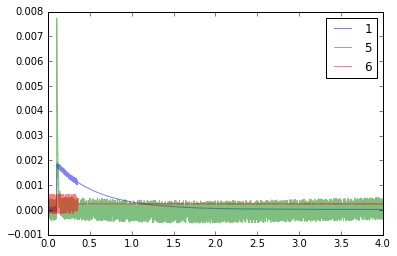

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (10.0, 8.0)

noise = 0.1

n = 10000
no_of_x = 4000
# Rise_signal = 1

def x_generator(n):
    input_x = np.zeros((n,no_of_x))
    mid = int(n*0.5)
    for i in range(n):
        input_x[i] = np.arange(0,4,0.001)
    return input_x

x_axis = x_generator(n)

"""Noise manipulator"""

# def slowvary(no_of_x,noise):
# 	z = np.random.rand(int(no_of_x/10.+1.))*noise
# 	y = np.zeros(no_of_x)
# 	for i in range(no_of_x):
# 		y1 = int(i/10.)
# 		y2 = int(i/10.+1)
# 		f = z[y2]-z[y1]
# 		y[i] = z[y1] + f*(i%10)/10.
# 	return y

# def noisegen(x, no_of_x):
#     y = np.zeros(no_of_x)
#     y1 = no_of_x-400
#     y2 = 0.5*x
#     test = slowvary(y1,y2)
#     for i in range(no_of_x):
#         if i <400:
#             y[i] = np.random.rand(1)*x - x/2.
#         else:
#             y[i] = test[i-400]-0.1
#     return y

# def damb1(x):
#     return np.exp(-x) + (np.random.rand(1)*noise - noise/2.)

# def damb2(x):
#     return np.exp(-x) + (np.random.rand(1)*0.2 - 0.1)

# def caf(x):
#     y = np.exp(-x)
#     split = np.random.rand(1)*len(x)*0.3 + 0.2*len(x)
#     z = np.piecewise(y,[y<split,y>=split], [lambda y:damb1(y), lambda y:damb2(y)])
#     return y


""" functions """
from sklearn.preprocessing import normalize

def beta(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2.
        split = (0.35 + np.random.rand(1)*0.01 - 0.005)/4.
        yall[i] = np.piecewise(y, [y<start, y>=start], [lambda y:0, lambda y:np.exp(-y*2)*10])
        
        yall[i][:int(no_of_x*split)] = yall[i][:int(no_of_x*split)] + np.random.rand(int(no_of_x*split))*noise*10 - 5*noise
        yall[i][int(no_of_x*split+1):] = yall[i][int(no_of_x*split+1):] + np.random.rand(int(no_of_x-no_of_x*split))*noise*0.1 - noise/20.
#         yall[i][int(no_of_x*split+1):] = yall[i][int(no_of_x*split+1):] + np.sin(y[int(no_of_x*split+1):]+np.random.rand(1)*np.pi) + np.random.rand(int(no_of_x-no_of_x*split))*noise - noise/2.
        yall[i] = yall[i] + 0.1
    yall = normalize(yall,norm="l1")
    return yall

def gamma(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        pileup = np.random.rand(1)*0.4
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y < start, y>=start , y >= pileup], [lambda y:0 ,lambda y:0.3*np.exp(-y), lambda y:np.exp(-y)])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
    return yall

def alt1(x):
    yall = np.zeros((n,no_of_x))
    half = 0.5
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y < start, y>=start, y >= half], [lambda y:0 ,lambda y:np.exp(-2*y), lambda y:np.exp(-(y+0.5))])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
    return yall

def alt3(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y<start, y>=start], [lambda y:0,lambda y:np.exp(-2*y)])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
    return yall

def LS(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        split = int(start*no_of_x/4)
        yall[i] = np.piecewise(y, [y<start, y>=start], [lambda y:0, lambda y:np.exp(-(start+y*100-100*start))])
#         yall[i] = yall[i] + (np.random.rand(no_of_x)*noise*0.1 - noise/20.) + 0.2
#         yall[i] = yall[i] + 0.2
        yall[i][:split] = yall[i][:split] + np.random.rand(split)*noise - noise/2.
        yall[i][int(split+1):] = yall[i][int(split+1):] + np.random.rand(no_of_x-split-1)*noise - noise/2.
        yall[i][int(split+1):] = yall[i][int(split+1):] + 0.01*np.sin(y[int(split+1):]+np.random.rand(1)*np.pi) + 0.01*np.exp(-y[int(split+1):])
    yall = normalize(yall,norm="l1")
    return yall

def BG(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]*100 + np.random.rand(1)
        split = (np.random.rand(1)*0.05 + 0.35)/4.
        yall[i][0:int(no_of_x*split)] = np.random.randint(10,size=int(no_of_x*split))*0.1 -0.5/2 + 0.1
        yall[i][(1+int(no_of_x*split)):no_of_x] = np.random.rand(int(no_of_x-no_of_x*(split)))*0.01 -0.005 + 0.3
    yall = normalize(yall,norm="l1")
    return yall

def LSplusCAF(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        change = 0.5 + np.random.rand(1)*0.1 -0.05
        dec = 8
        yall[i] = np.piecewise(y, [y<start, y>=start, y>=change],[lambda y:0, lambda y:np.exp(-(start+dec*y-dec*start)), lambda y:np.exp(-(dec*change+y-dec*start-change+start))])
        yall[i] = yall[i] + np.random.rand(no_of_x)*noise - noise/2. 
    return yall

x1 = beta(x_axis)
print(x1.shape)
# x2 = gamma(x_axis)
# print("2")
# x3 = alt1(x_axis)
# print("3")
# x4 = alt3(x_axis)
# print("4")
x5 = LS(x_axis)
print(x5.shape)
x6 = BG(x_axis)
print(x6.shape)
# x7 = LSplusCAF(x_axis)
# print("7")

plt.figure()
plt.plot(x_axis[1],x1[1],label="1",alpha=0.5)
# plt.plot(x_axis[1],x2[1],label="2",alpha=0.5)
# plt.plot(x_axis[1],x3[1],label="3",alpha=0.5)
# plt.plot(x_axis[1],x4[1],label="4",alpha=0.5)
plt.plot(x_axis[1],x5[1],label="5",alpha=0.5)
plt.plot(x_axis[1],x6[1],label="6",alpha=0.5)
# plt.plot(x_axis[1],x7[1],label="7",alpha=0.5)
plt.legend()
plt.show()

# Reference Pulse

reproduced from Run009 with cut condition as presented by Ishikawa 

(1996, 4000)


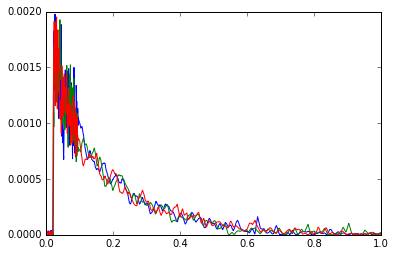

In [14]:
from root_pandas import read_root

RefPulse = read_root("RefPulse.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

lr,hr = RefPulse.shape
lr=int(lr/4480)

from sklearn.preprocessing import normalize

def NORMPMTALL(pmtall,num_entries):
    """
    Convert read_root into numpy for speed
    invert the PMT pulse
    get rid of the last 80 bin as those bins of the pulse do not matter
    """
    x = pmtall.PMTALL.values.reshape(num_entries,4480)
    x_abs = abs(x-15190)
    extra = np.arange(4000,4480)
#     initial = np.arange(50)

    x_mod = np.delete(x_abs,extra,axis=1)
#     x_f = np.delete(x_mod,initial,axis=1)
    x_nor = normalize(x_mod,norm="l1")
    # print(np.sum(x_nor,axis=1))
    return x_nor

RefPul = NORMPMTALL(RefPulse,lr)
print(RefPul.shape)

plot_x = np.arange(0,1,1/len(RefPul[0]))
plt.figure()
plt.plot(plot_x,RefPul[np.random.randint(100)])
plt.plot(plot_x,RefPul[np.random.randint(100)])
plt.plot(plot_x,RefPul[np.random.randint(100)])
plt.show()

# Crystal 11 Alpha events

reproduced using infomation from past NAP meetings

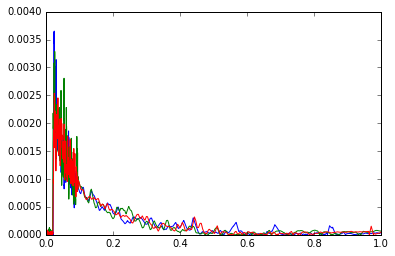

(1572, 4000)


In [3]:
alpha = read_root("Alpha_11.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

la,ha = alpha.shape
la=int(la/4480)

Alpha = NORMPMTALL(alpha,la)

plot_a = np.arange(0,1,1/len(Alpha[0]))
plt.figure()
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))])
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))])
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))])
plt.show()
print(Alpha.shape)

# Comparison plot of RelPul and Alpha

This is just a overlaid plot of the alpha and gamma events

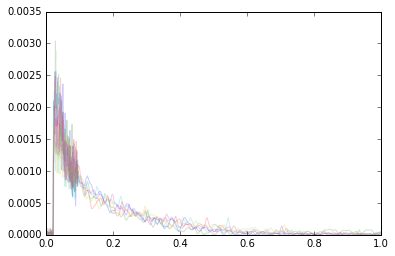

In [4]:
plt.figure()
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))],alpha=0.2)
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))],alpha=0.2)
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))],alpha=0.2)
plt.plot(plot_x,RefPul[np.random.randint(len(RefPul))],alpha=0.2)
plt.plot(plot_x,RefPul[np.random.randint(len(RefPul))],alpha=0.2)
plt.plot(plot_x,RefPul[np.random.randint(len(RefPul))],alpha=0.2)
plt.show()

# Creating additional false data for RefPul and Alpha

To provide sufficient data for training, random noise are added to generate additional number of data. 

(10000, 4000)
(10000, 4000)


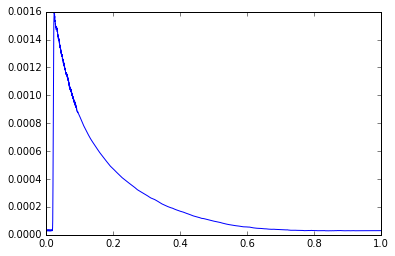

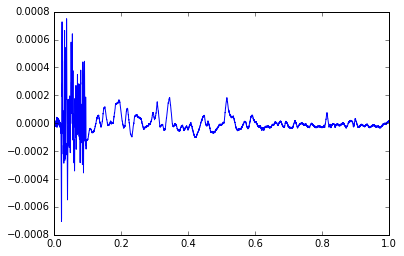

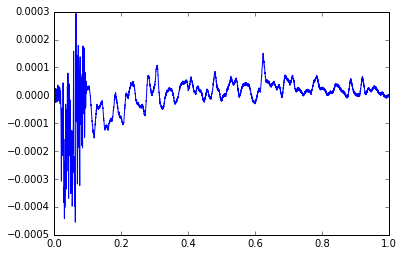

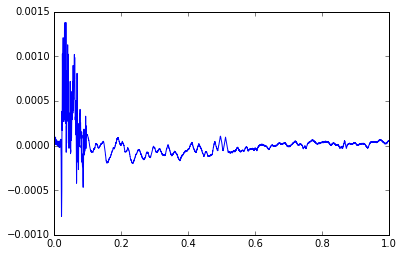

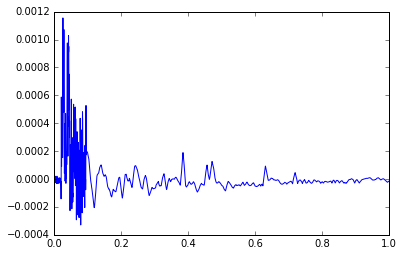

In [10]:
def avg(x):
    y = np.average(x,axis=0)
    return y

STANDARD = avg(RefPul)

def generator(x,n,z):
    y = np.zeros((n,len(x[0])))   
    for i in range(n):
        y[i] = x[np.random.randint(len(x))] + np.random.rand(len(x[0]))*z - z/2.
    
    for i in range(len(x)):
        y[i] = x[i]
        
    for i in range(n):
        y[i] = y[i] - STANDARD
    return y

RefPul_G = generator(RefPul,n,0.00001)
Alpha_G = generator(Alpha,n,0.00001)

print(RefPul_G.shape)
print(Alpha_G.shape)

plt.figure()
plt.plot(plot_x,STANDARD)
plt.show()
plt.figure()
plt.plot(plot_x,RefPul_G[np.random.randint(n)])
plt.show()
plt.figure()
plt.plot(plot_x,RefPul_G[np.random.randint(n)])
plt.show()
plt.figure()
plt.plot(plot_x,Alpha_G[np.random.randint(n)])
plt.show()
plt.figure()
plt.plot(plot_x,Alpha_G[np.random.randint(n)])
plt.show()

# Separation of data into training and validation

The initial portion of the code is a procedure to splitting data into training and testing/validation purposes. Also labelling of data is also created prepare to feed into our simple CNN model(this may change)

# Normalizing data and ignoring pulse height

To train the CNN model efficiently, normalization of the training and validation data needed to done. An unormalized data can lead to produce incorrect CNN model. Previous test were carried and training of the CNN model meet with difficuluties and incorrectness.

# Constructing our CNN model and train it

80% of the data is used for training with the remaining 20% for validation/testing of the CNN model.

For this case I decided to use a simple CNN model. In future I am thinking of trying various models/algorithm.


Separation
training label
test label


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3997, 8)           40        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3994, 16)          528       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1997, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1997, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31952)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1022496   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
__________

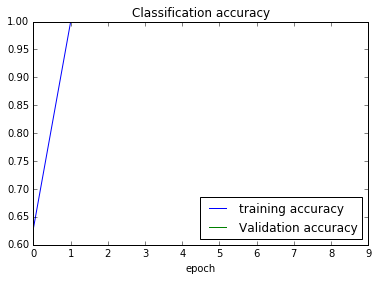

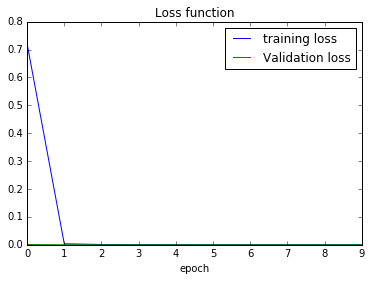

Classification accuracy = 1.0


2017-10-27 14:56:01.068665: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-10-27 14:56:01.068688: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.


In [6]:
def separation(x,ratio):
	train = np.zeros((int(len(x)*ratio),len(x[0])))
	test = np.zeros((int(len(x)*(1.-ratio)),len(x[0])))
	for i in range(len(x)):
		if i < int(len(x)*ratio):
			train[i] = x[i]
		if i >= int(len(x)*ratio):
			k = i - int(len(x)*ratio) - 1
			test[k] = x[i]
	return train, test

train_beta, test_beta = separation(x1,0.8)
# train_gamma, test_gamma  = separation(x2,0.8)
# train_3, test_3  = separation(x3,0.8)
# train_4, test_4  = separation(x4,0.8)
train_5, test_5  = separation(x5,0.8)
train_6, test_6  = separation(x6,0.8)
# train_7, test_7  = separation(x7,0.8)
# train_RF, test_RF = separation(RefPul_G,0.8)
# train_alpha, test_alpha = separation(Alpha_G,0.8)

print("Separation")

def labelling(x,num):
	label = np.zeros(len(x))
	for i in range(len(x)):
		label[i] = num
	return label

label_train_beta = labelling(train_beta,0)
# label_train_gamma = labelling(train_gamma,1)
# label_train_3 = labelling(train_3,2)
# label_train_4 = labelling(train_4,3)
label_train_5 = labelling(train_5,1)
label_train_6 = labelling(train_6,2)
# label_train_7 = labelling(train_7,3)
# label_train_RF = labelling(train_RF,3)
# label_train_alpha = labelling(train_alpha,4)
print("training label")

label_test_beta = labelling(test_beta,0)
# label_test_gamma = labelling(test_gamma,1)
# label_test_3 = labelling(test_3,2)
# label_test_4 = labelling(test_4,3)
label_test_5 = labelling(test_5,1)
label_test_6 = labelling(test_6,2)
# label_test_7 = labelling(test_7,3)
# label_test_RF = labelling(test_RF,3)
# label_test_alpha = labelling(test_alpha,4)
print("test label")

data_train = np.concatenate((train_beta,train_5,train_6), axis=0)
data_test = np.concatenate((test_beta,test_5,test_6), axis=0)
label_train = np.concatenate((label_train_beta,label_train_5,label_train_6),axis=0)
label_test = np.concatenate((label_test_beta,label_test_5,label_test_6),axis=0)

data_train = np.expand_dims(data_train,axis=2)
data_test = np.expand_dims(data_test,axis=2)

import keras

classes = 3

label_train = keras.utils.to_categorical(label_train, classes)
label_test = keras.utils.to_categorical(label_test, classes)

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization

from keras.regularizers import l2
from keras.optimizers import SGD

""" Convulution Neural Network """

model = Sequential()
model.add(Conv1D(8, kernel_size=4, activation="relu", input_shape=(no_of_x,1)))
model.add(Conv1D(16, 4, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes,activation="softmax"))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(data_train, label_train, batch_size=50, epochs=10, verbose=1, validation_data=(data_test,label_test))
score = model.evaluate(data_test, label_test, verbose=0)
model.save("for_root_implementation.h5")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="training accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])

# testing on sample.root

To validate that this method is a viable choice of classification in physics experiment.

I have worked out working flow for the moment of the code structure. from training to applying model to predict evaluation of our model.

Work still needed to be done to improve the performance of our model as it is still very crude.

#### Either completelt produce shape with the quirks with just pure functions(very difficult due to complexity in the signals itself)

#### Work out a fully workable pulse shape simulator which require some work in geant4(difficult as I do not have the expertises in this and the lack of expert to refer to)

41250/41259 [============================>.] - ETA: 0s

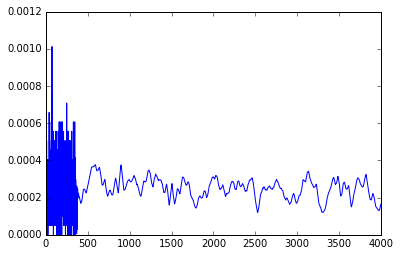

entry = 21381
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.61012731e-10   4.96434227e-09   1.00000000e+00]


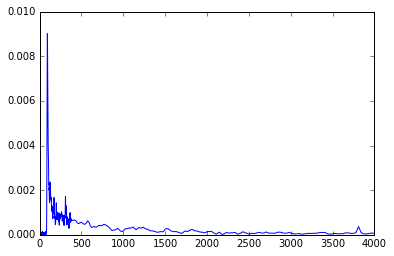

entry = 30221
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  2.74930130e-06   9.99997258e-01   2.84984314e-10]


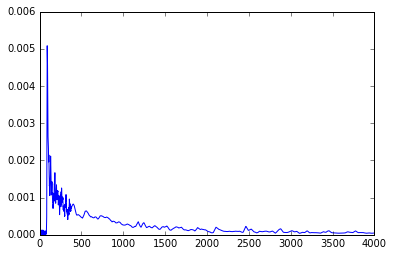

entry = 18762
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.78354621e-01   3.21640760e-01   4.59321882e-06]


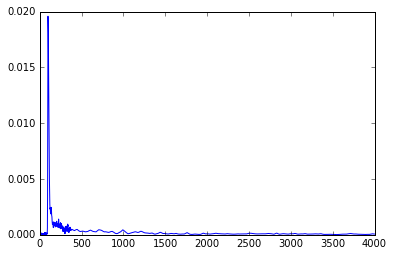

entry = 6299
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  8.30311356e-30   1.00000000e+00   1.39501241e-33]


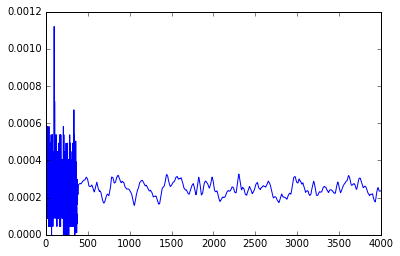

entry = 22273
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  8.81916901e-11   2.09044888e-08   1.00000000e+00]


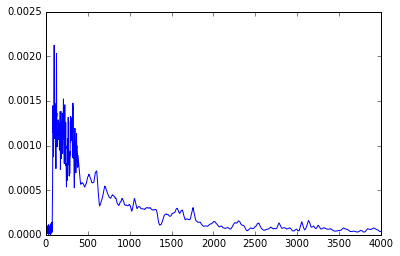

entry = 26719
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99991298e-01   6.75245474e-06   1.85075658e-06]


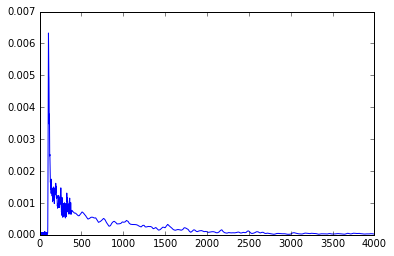

entry = 15317
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  5.02631709e-04   9.99497294e-01   5.72830065e-12]


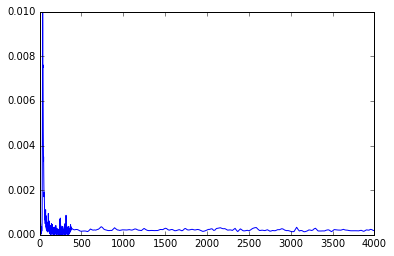

entry = 35739
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.35953974e-11   4.17298054e-08   1.00000000e+00]


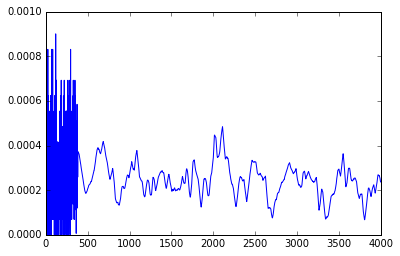

entry = 105
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  3.35061312e-10   7.58215890e-09   1.00000000e+00]


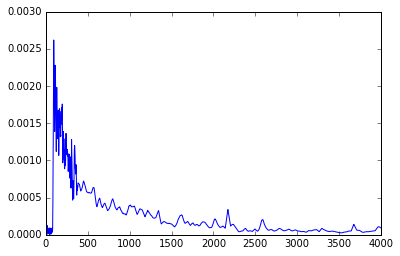

entry = 37533
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99971747e-01   2.82529563e-05   3.97733331e-08]


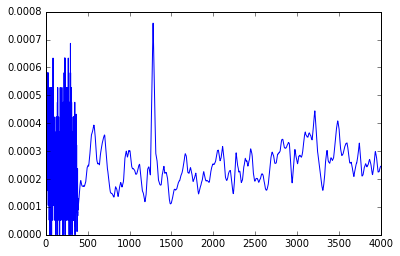

entry = 36689
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.05801520e-11   2.03432537e-09   1.00000000e+00]


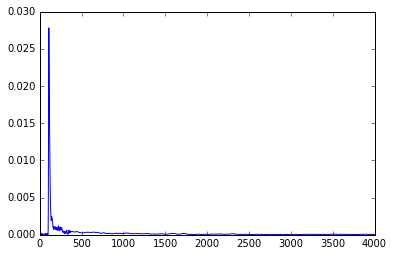

entry = 2056
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  8.72788840e-29   1.00000000e+00   1.58706608e-38]


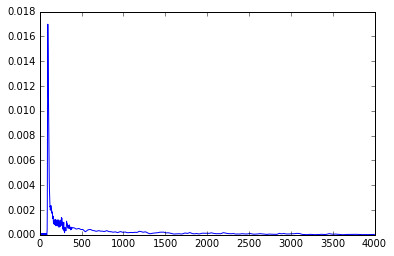

entry = 6300
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.47696818e-23   1.00000000e+00   4.16205017e-27]


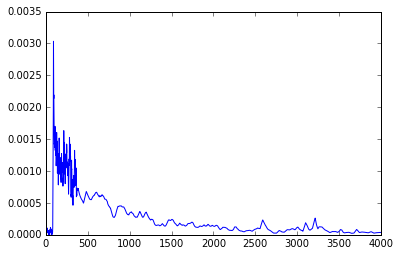

entry = 5509
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99988794e-01   1.02634349e-05   9.53955578e-07]


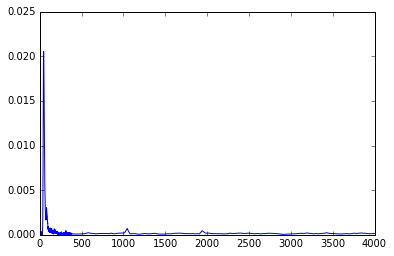

entry = 31975
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  2.00501117e-12   1.42200534e-07   9.99999881e-01]


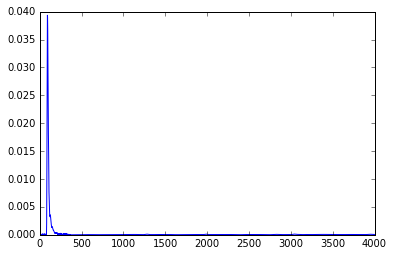

entry = 13888
[signal,LS,BG,RefPulse,AlphaCrys#11]
[ 0.  1.  0.]


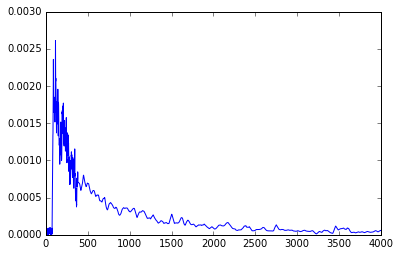

entry = 38756
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99995947e-01   4.08918913e-06   5.94514304e-09]


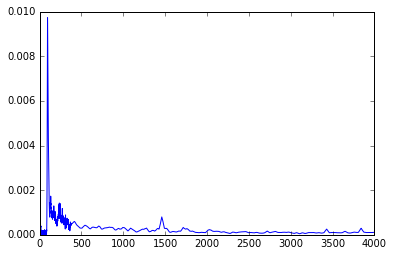

entry = 12330
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.32790001e-12   1.00000000e+00   3.39299704e-12]


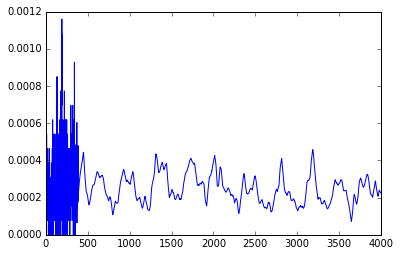

entry = 33145
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  2.78895212e-10   3.89576904e-09   1.00000000e+00]


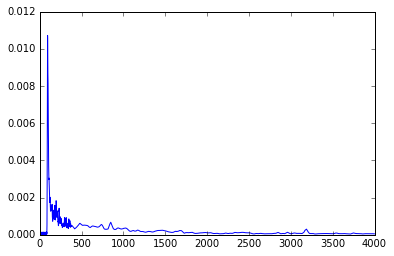

entry = 37232
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.65492522e-11   1.00000000e+00   6.28528737e-14]


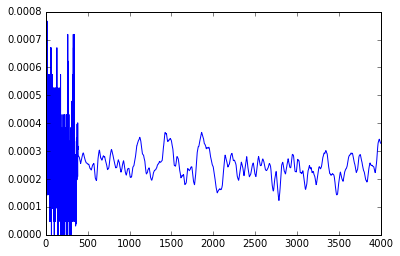

entry = 13742
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.08977008e-10   4.84975970e-09   1.00000000e+00]


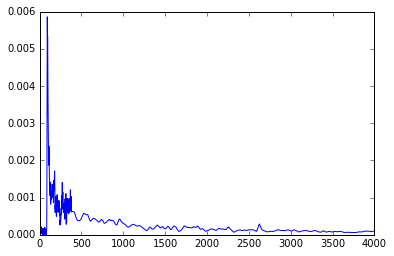

entry = 19394
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  5.70181815e-04   9.99429047e-01   7.35067715e-07]


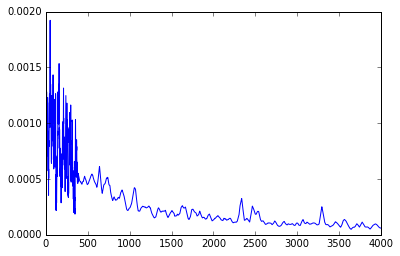

entry = 37802
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.32383361e-01   2.65742914e-04   8.67350936e-01]


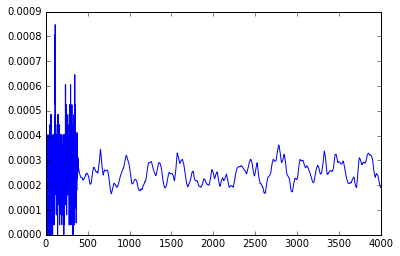

entry = 11181
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.05956875e-10   5.79063508e-09   1.00000000e+00]


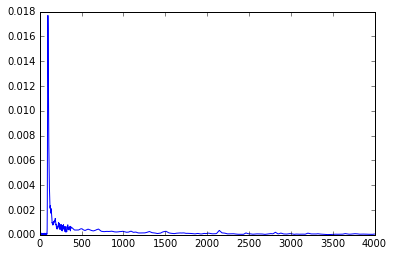

entry = 15812
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  3.88710521e-25   1.00000000e+00   3.66994348e-27]


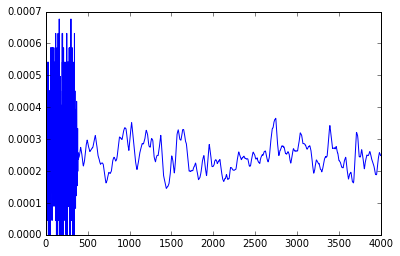

entry = 25456
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.88085769e-10   6.01973493e-09   1.00000000e+00]


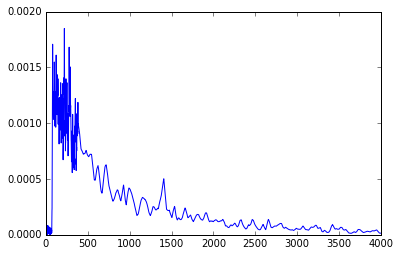

entry = 25968
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99998808e-01   8.25206257e-07   3.35163065e-07]


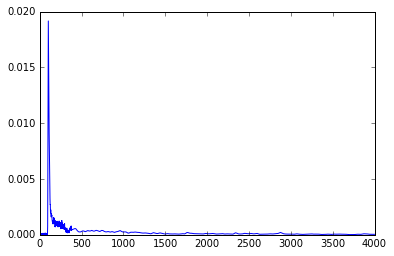

entry = 24139
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  5.98738217e-29   1.00000000e+00   5.03316329e-34]


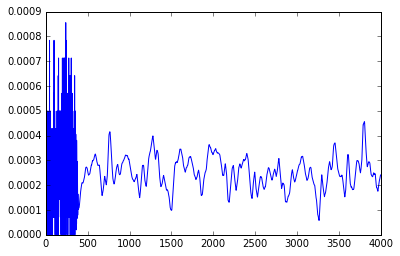

entry = 30110
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.21860980e-10   4.65241801e-09   1.00000000e+00]


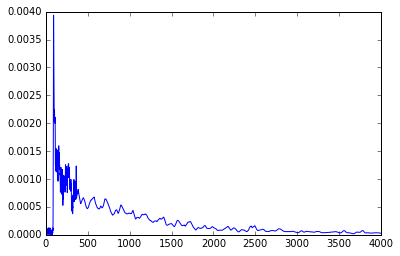

entry = 9963
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.94349778e-01   5.64735755e-03   2.88204910e-06]


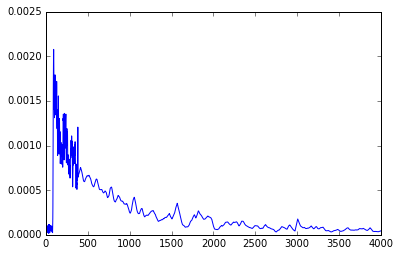

entry = 7756
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99956489e-01   4.16197945e-05   1.86425063e-06]


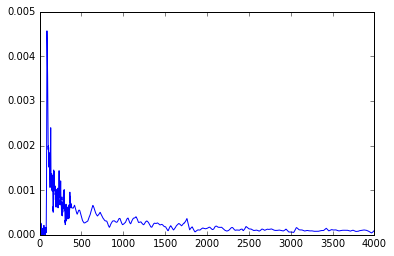

entry = 24862
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.84237465e-01   8.15286040e-01   4.76395478e-04]


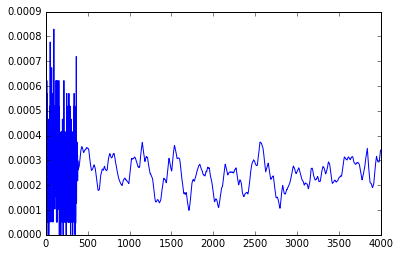

entry = 27503
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.96841682e-10   9.32159150e-09   1.00000000e+00]


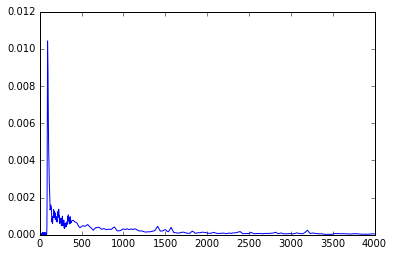

entry = 35154
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.84502912e-12   1.00000000e+00   2.45341272e-15]


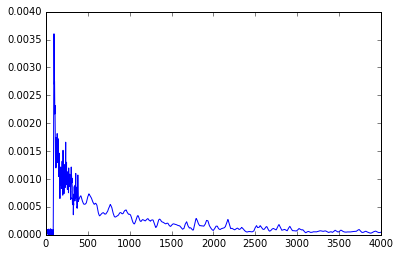

entry = 12076
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.43192065e-01   5.68062551e-02   1.72140835e-06]


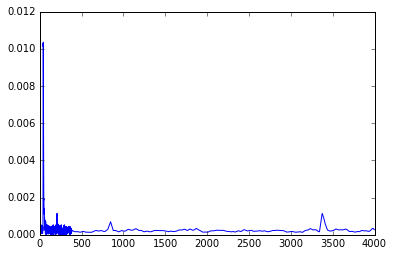

entry = 30712
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  2.50134913e-11   3.42374507e-09   1.00000000e+00]


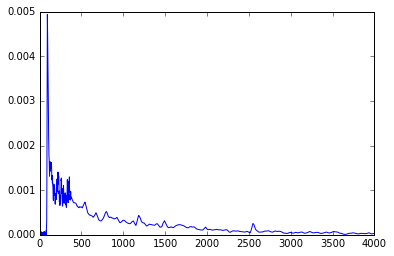

entry = 29550
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  2.63030112e-01   7.36969531e-01   3.10085028e-07]


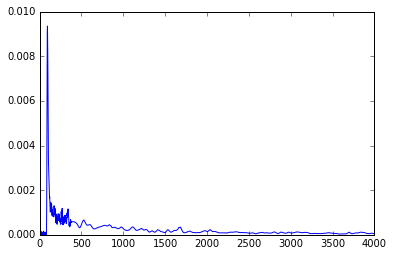

entry = 3484
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  8.74251838e-10   1.00000000e+00   7.68197832e-12]


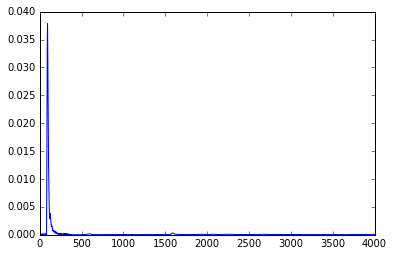

entry = 18643
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  3.62419335e-38   1.00000000e+00   4.90030766e-38]


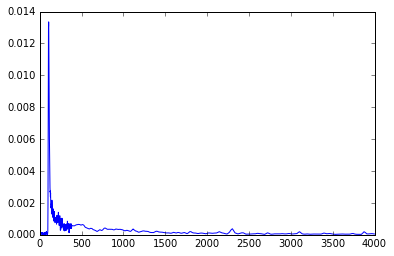

entry = 5214
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.09244888e-20   1.00000000e+00   6.26978266e-25]


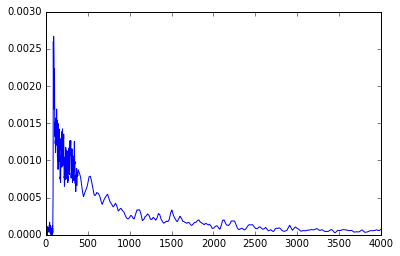

entry = 23489
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99958038e-01   4.11587898e-05   8.66311211e-07]


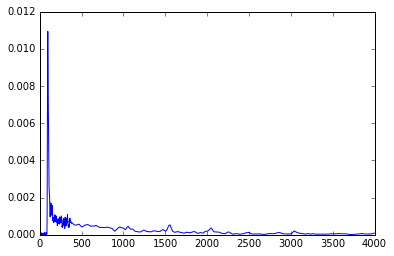

entry = 7079
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  3.40892028e-13   1.00000000e+00   1.80059236e-15]


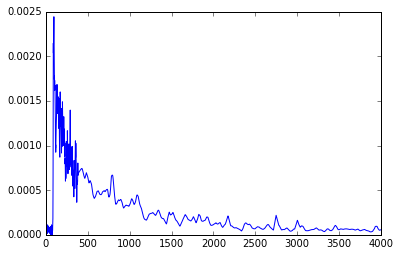

entry = 10638
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  9.99937892e-01   6.06515459e-05   1.40538020e-06]


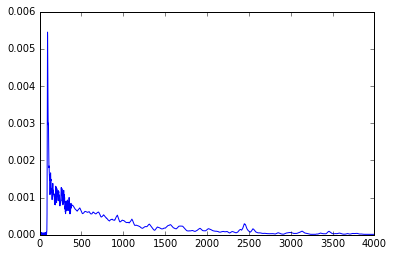

entry = 5843
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  2.87369221e-01   7.12630749e-01   1.17649286e-07]


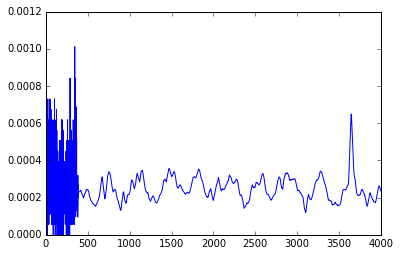

entry = 34277
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  7.84514398e-11   8.25532265e-09   1.00000000e+00]


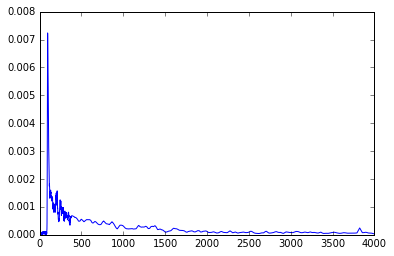

entry = 24737
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.46173461e-08   9.99999881e-01   5.62040475e-12]


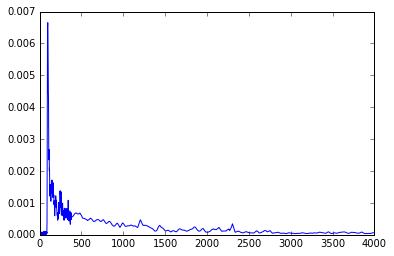

entry = 31046
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  6.23009200e-08   9.99999881e-01   6.89727919e-12]


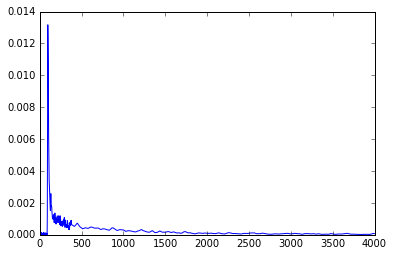

entry = 39991
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  5.54498241e-17   1.00000000e+00   2.17362256e-20]


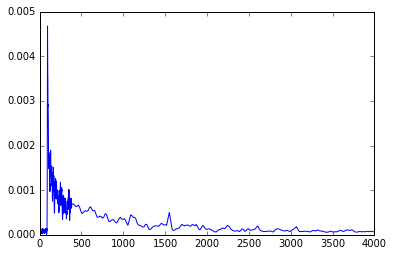

entry = 9994
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  1.45838782e-01   8.54142427e-01   1.87278874e-05]


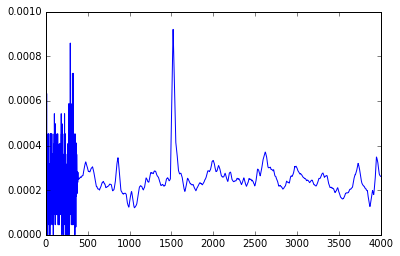

entry = 35933
[signal,LS,BG,RefPulse,AlphaCrys#11]
[  7.73128367e-11   8.43374970e-09   1.00000000e+00]
(41259,)


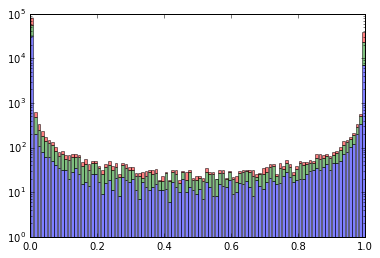

In [20]:
from root_pandas import read_root

pmtall = read_root("Run009-230-001.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

l,h = pmtall.shape
l=int(l/4480)

PMTALL = NORMPMTALL(pmtall,l)
pmtall_ori = np.expand_dims(PMTALL,axis=2)

preds = model.predict(pmtall_ori,batch_size=50,verbose=1)

# print(preds)
x = np.arange(len(pmtall_ori[1]))

for i in range(50):
    k = np.random.randint(len(PMTALL))
    plt.figure()
    plt.plot(x,PMTALL[k])
    plt.show()
    print("entry =",k)
    print("[signal,LS,BG,RefPulse,AlphaCrys#11]")
    print(preds[k])

indices = np.argmax(preds,axis=1)
print(indices.shape)
    
plt.figure()
plt.yscale("log")
plt.hist(preds,100,stacked=True,alpha=0.5)
plt.show()

So i managed to get it to work as intended. need more further check.
 next goal if full separation of alpha and gamma
 
# A separate network for alpha and gamma classification

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 3961, 4)           164       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 3922, 8)           1288      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 196, 8)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 196, 8)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                25104     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
__________

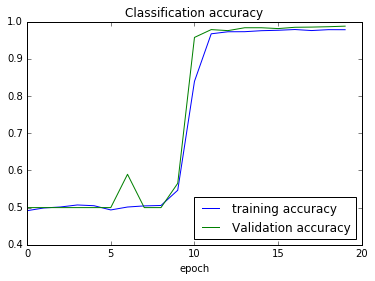

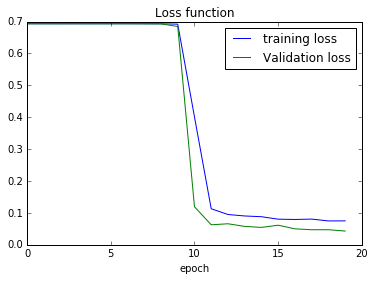

Classification accuracy = 0.987743874679


In [12]:
train_RF, test_RF = separation(RefPul_G,0.8)
train_alpha, test_alpha = separation(Alpha_G,0.8)

label_train_RF = labelling(train_RF,0)
label_train_alpha = labelling(train_alpha,1)

label_test_RF = labelling(test_RF,0)
label_test_alpha = labelling(test_alpha,1)

data_train2 = np.concatenate((train_RF,train_alpha), axis=0)
data_test2 = np.concatenate((test_RF,test_alpha), axis=0)
label_train2 = np.concatenate((label_train_RF,label_train_alpha),axis=0)
label_test2 = np.concatenate((label_test_RF,label_test_alpha),axis=0)

data_train2 = np.expand_dims(data_train2,axis=2)
data_test2 = np.expand_dims(data_test2,axis=2)

classes2 = 2

label_train2 = keras.utils.to_categorical(label_train2, classes2)
label_test2 = keras.utils.to_categorical(label_test2, classes2)

model2 = Sequential()
model2.add(Conv1D(4, kernel_size=10, activation="relu", input_shape=(no_of_x,1)))
model2.add(Conv1D(8, 10, activation="relu"))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(16,activation="relu"))
model2.add(Dense(32,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(classes2,activation="softmax"))
model2.summary()
model2.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history2 = model2.fit(data_train2, label_train2, batch_size=50, epochs=40, verbose=1, validation_data=(data_test2,label_test2))
score2 = model2.evaluate(data_test2, label_test2, verbose=0)
model2.save("for_root_implementation2.h5")

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

print(history2.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history2.history['acc'],label="training accuracy")
plt.plot(history2.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history2.history['loss'],label="training loss")
plt.plot(history2.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history2.history['val_acc'][-1])

# make a confirmation check on the 2nd part of model for further signal like classification

41250/41259 [============================>.] - ETA: 0s

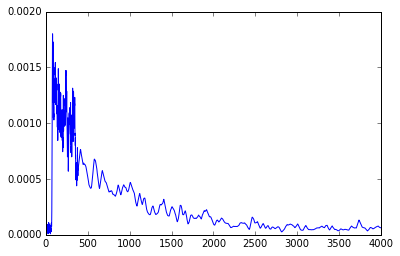

[  9.99984026e-01   1.15014427e-05   4.54944029e-06]
[RefPulse,AlphaCrys#11]
[ 0.02864017  0.97135979]


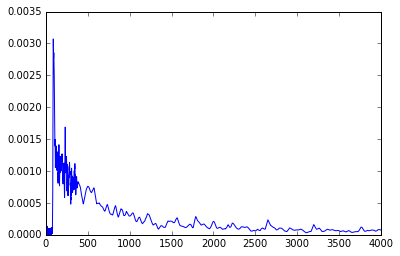

[  9.99610960e-01   3.82862345e-04   6.16723673e-06]
[RefPulse,AlphaCrys#11]
[  2.04638491e-05   9.99979496e-01]


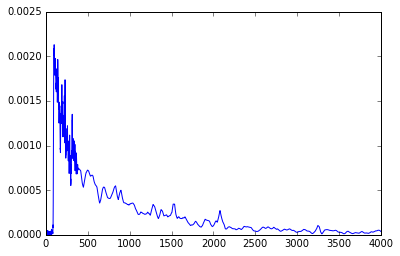

[  9.99990582e-01   9.41591225e-06   4.36876713e-09]
[RefPulse,AlphaCrys#11]
[  2.27213808e-04   9.99772847e-01]


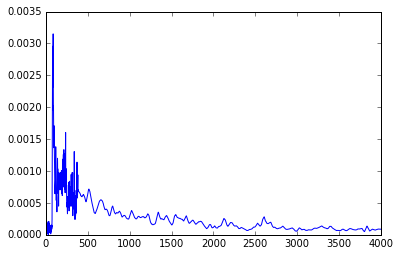

[ 0.8271457   0.00105491  0.17179938]
[RefPulse,AlphaCrys#11]
[  5.60443914e-05   9.99943972e-01]


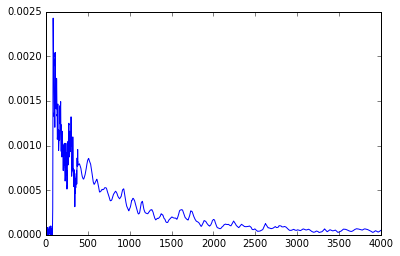

[  9.99957681e-01   4.15311079e-05   8.20382695e-07]
[RefPulse,AlphaCrys#11]
[ 0.01497321  0.98502678]


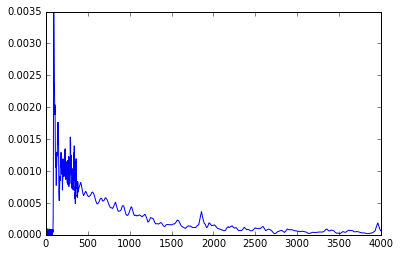

[  9.99589860e-01   4.09969740e-04   2.23209469e-07]
[RefPulse,AlphaCrys#11]
[ 0.00164241  0.99835759]


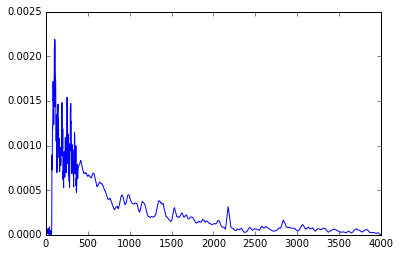

[  9.98513520e-01   1.48199231e-03   4.47092680e-06]
[RefPulse,AlphaCrys#11]
[ 0.00329687  0.99670309]


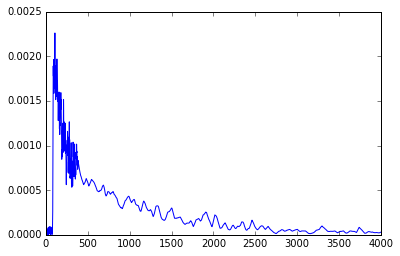

[  9.99832034e-01   1.67840175e-04   8.99079140e-08]
[RefPulse,AlphaCrys#11]
[  1.01111909e-04   9.99898911e-01]


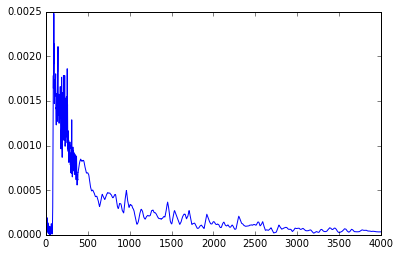

[  9.99997854e-01   2.11416045e-06   1.01448281e-08]
[RefPulse,AlphaCrys#11]
[  3.52837997e-05   9.99964714e-01]


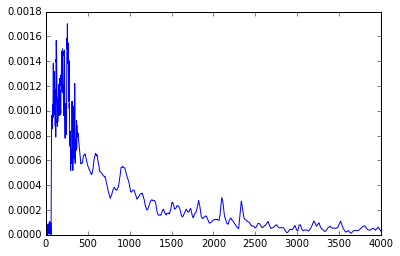

[  9.99996066e-01   1.69361397e-06   2.25643521e-06]
[RefPulse,AlphaCrys#11]
[ 0.21834649  0.78165352]


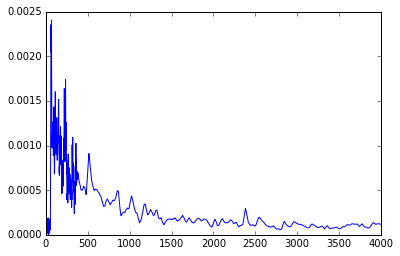

[  9.90772486e-01   2.69494572e-04   8.95803887e-03]
[RefPulse,AlphaCrys#11]
[  2.26467193e-04   9.99773562e-01]


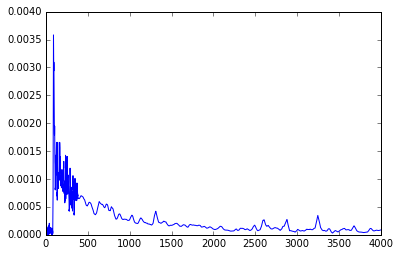

[  9.98554409e-01   1.33840053e-03   1.07167660e-04]
[RefPulse,AlphaCrys#11]
[  4.04675666e-05   9.99959588e-01]


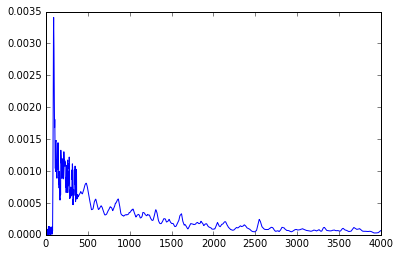

[  9.96919036e-01   3.00332555e-03   7.75945227e-05]
[RefPulse,AlphaCrys#11]
[  1.21937272e-04   9.99878049e-01]


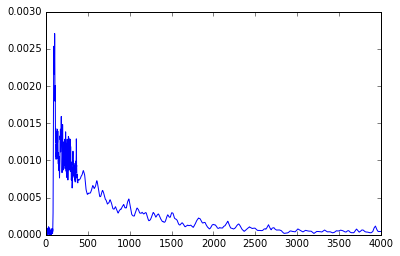

[  9.99430239e-01   5.69564872e-04   1.56149113e-07]
[RefPulse,AlphaCrys#11]
[ 0.00238755  0.99761248]


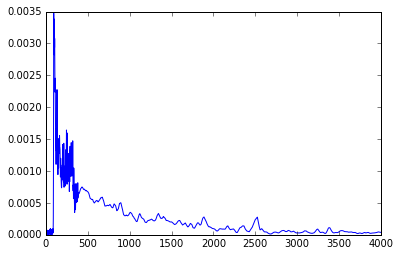

[  9.59148467e-01   4.08513695e-02   1.08084002e-07]
[RefPulse,AlphaCrys#11]
[  7.44686758e-06   9.99992609e-01]


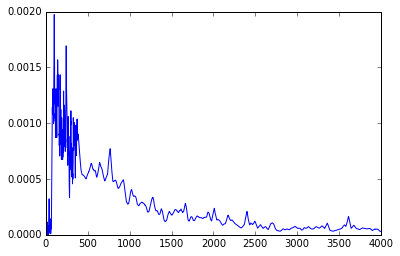

[  9.99924302e-01   5.30946309e-05   2.26240645e-05]
[RefPulse,AlphaCrys#11]
[ 0.3717728   0.62822717]


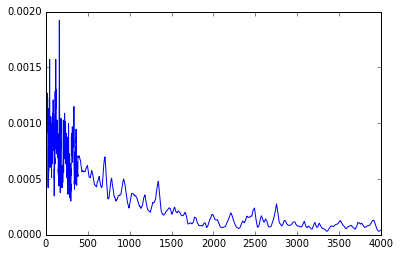

[  7.57301688e-01   3.66172026e-04   2.42332160e-01]
[RefPulse,AlphaCrys#11]
[ 0.00551072  0.99448931]


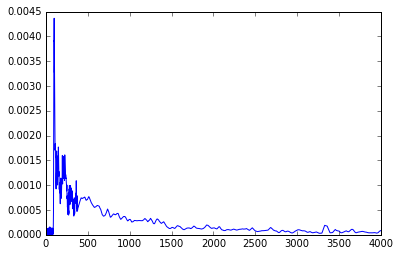

[  6.91126525e-01   3.08872253e-01   1.19646540e-06]
[RefPulse,AlphaCrys#11]
[  1.24024918e-05   9.99987602e-01]


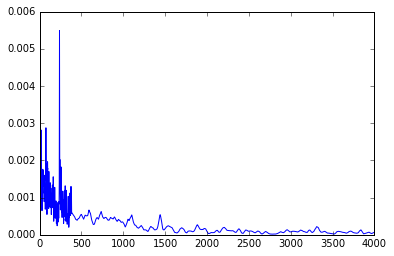

[  9.77496922e-01   8.70683114e-04   2.16323286e-02]
[RefPulse,AlphaCrys#11]
[  1.60974392e-04   9.99838948e-01]


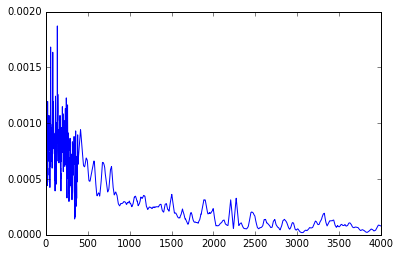

[  8.61517787e-01   1.60156022e-04   1.38322115e-01]
[RefPulse,AlphaCrys#11]
[ 0.00216349  0.99783653]


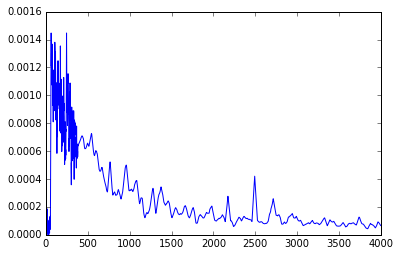

[  9.97643769e-01   1.32158486e-04   2.22412054e-03]
[RefPulse,AlphaCrys#11]
[  4.27810446e-04   9.99572217e-01]


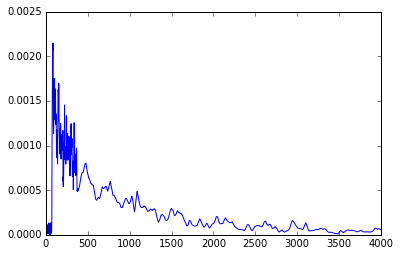

[  9.99925017e-01   6.79572549e-05   6.98417944e-06]
[RefPulse,AlphaCrys#11]
[ 0.00261737  0.99738258]


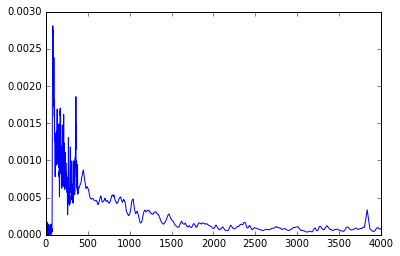

[  9.99823034e-01   9.24074120e-05   8.46669791e-05]
[RefPulse,AlphaCrys#11]
[  4.58426977e-04   9.99541640e-01]


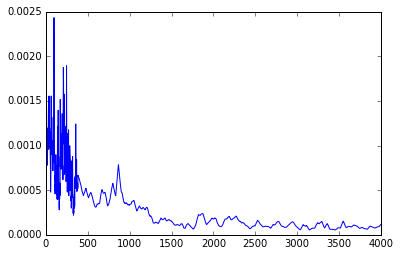

[  5.75441360e-01   3.67902772e-04   4.24190760e-01]
[RefPulse,AlphaCrys#11]
[  4.16170806e-04   9.99583781e-01]


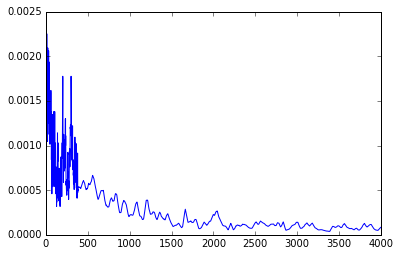

[  7.20572293e-01   3.05538240e-04   2.79122144e-01]
[RefPulse,AlphaCrys#11]
[  5.49177872e-04   9.99450862e-01]


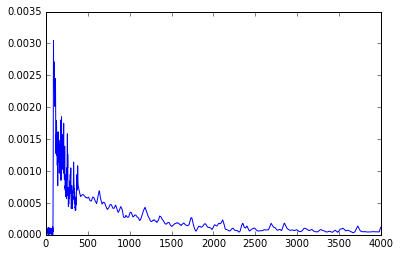

[  9.59600747e-01   4.03975286e-02   1.66086602e-06]
[RefPulse,AlphaCrys#11]
[  3.96859832e-06   9.99996066e-01]


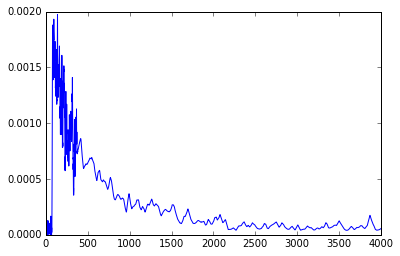

[  9.99990344e-01   9.32741114e-06   3.00737810e-07]
[RefPulse,AlphaCrys#11]
[  2.41092770e-04   9.99758899e-01]


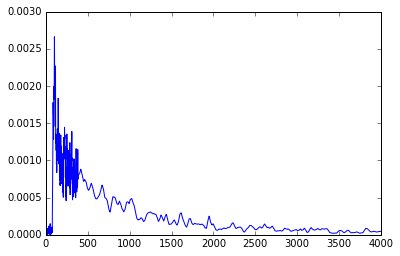

[  9.97130990e-01   2.86771660e-03   1.34735376e-06]
[RefPulse,AlphaCrys#11]
[ 0.00243965  0.99756038]


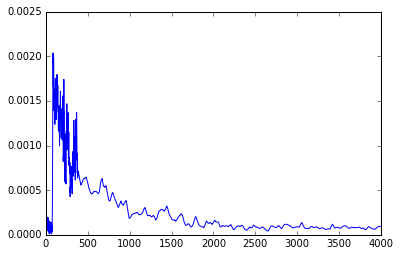

[  9.99991894e-01   7.53812219e-06   6.20424203e-07]
[RefPulse,AlphaCrys#11]
[  1.27214691e-04   9.99872804e-01]


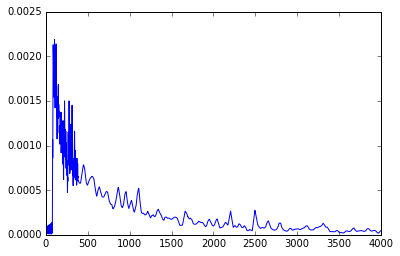

[  9.99759614e-01   2.39827306e-04   5.70776308e-07]
[RefPulse,AlphaCrys#11]
[  3.65917731e-05   9.99963403e-01]


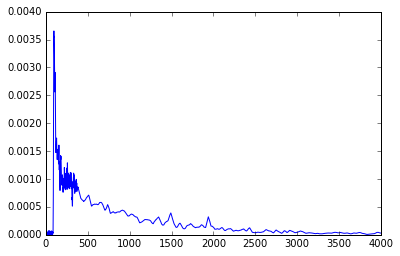

[  7.69062757e-01   2.30937198e-01   8.33605469e-08]
[RefPulse,AlphaCrys#11]
[  1.87485489e-06   9.99998093e-01]


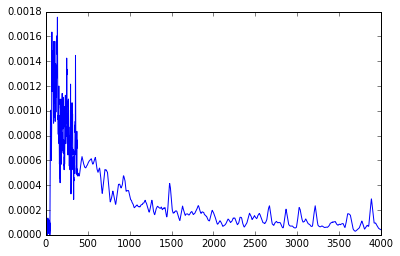

[  9.95284736e-01   7.55098357e-04   3.96020757e-03]
[RefPulse,AlphaCrys#11]
[  2.37204062e-04   9.99762833e-01]


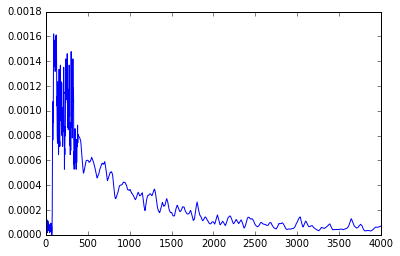

[  9.99958634e-01   3.68439978e-05   4.54195970e-06]
[RefPulse,AlphaCrys#11]
[ 0.66066808  0.33933198]


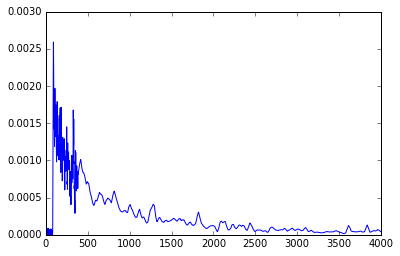

[  9.99993205e-01   6.64623349e-06   1.43692318e-07]
[RefPulse,AlphaCrys#11]
[ 0.0040846   0.99591535]


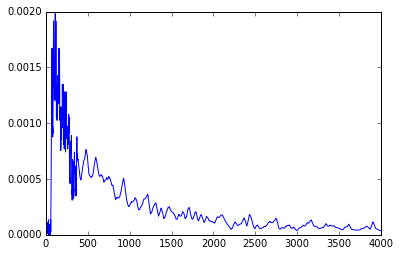

[  9.99833822e-01   1.40183416e-04   2.59271219e-05]
[RefPulse,AlphaCrys#11]
[  5.21437963e-04   9.99478638e-01]


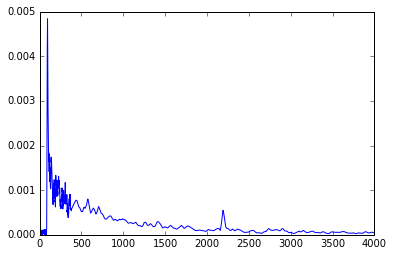

[  7.35296190e-01   2.64699757e-01   4.15404838e-06]
[RefPulse,AlphaCrys#11]
[  5.21071229e-07   9.99999523e-01]


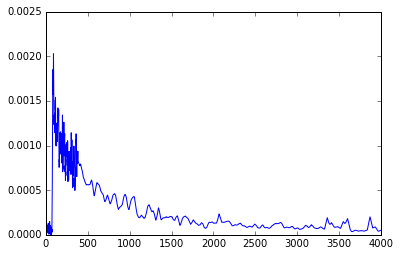

[  9.99902725e-01   4.04644961e-05   5.68015676e-05]
[RefPulse,AlphaCrys#11]
[ 0.00165308  0.99834692]


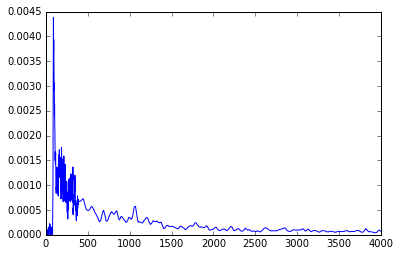

[  9.22237754e-01   7.77433068e-02   1.89107013e-05]
[RefPulse,AlphaCrys#11]
[  1.18978926e-06   9.99998808e-01]


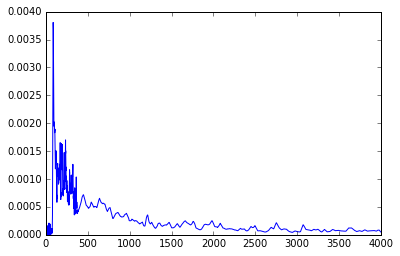

[  9.97930646e-01   2.01074569e-03   5.85991074e-05]
[RefPulse,AlphaCrys#11]
[  4.26079396e-06   9.99995708e-01]


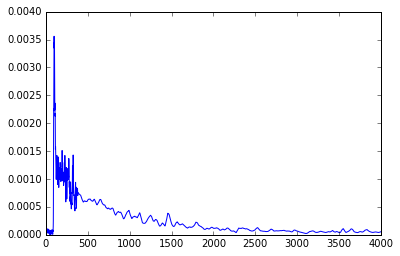

[  7.94013560e-01   2.05985323e-01   1.13022122e-06]
[RefPulse,AlphaCrys#11]
[  1.40280928e-04   9.99859691e-01]


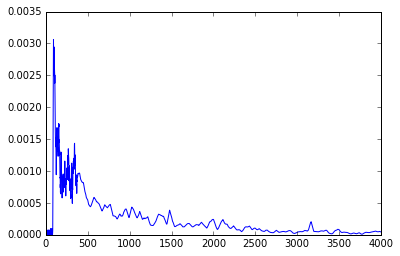

[  9.89528477e-01   1.04710078e-02   4.85589169e-07]
[RefPulse,AlphaCrys#11]
[  4.44478655e-06   9.99995589e-01]


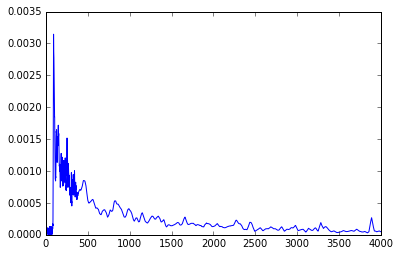

[  9.99494791e-01   4.87118989e-04   1.80693896e-05]
[RefPulse,AlphaCrys#11]
[  8.42419759e-05   9.99915719e-01]


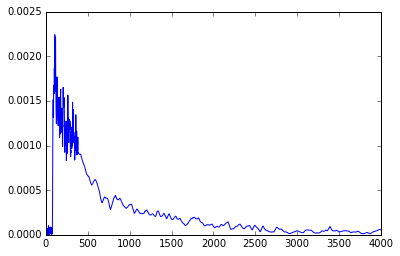

[  9.99999046e-01   9.95413643e-07   9.84524795e-10]
[RefPulse,AlphaCrys#11]
[  3.93233204e-04   9.99606788e-01]


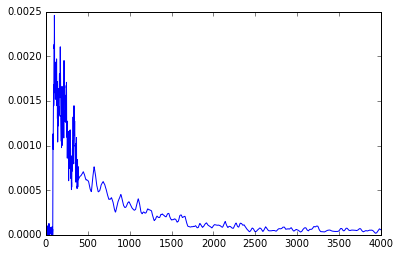

[  9.99997854e-01   2.18590640e-06   1.84744009e-09]
[RefPulse,AlphaCrys#11]
[  7.15774659e-05   9.99928474e-01]


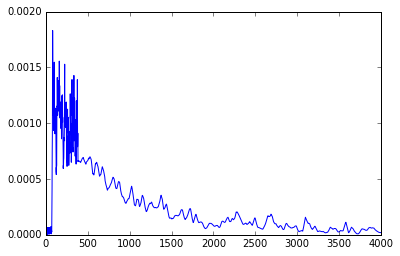

[  9.99993324e-01   1.33340745e-06   5.38626409e-06]
[RefPulse,AlphaCrys#11]
[ 0.64881164  0.35118836]


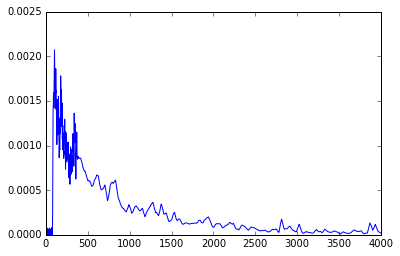

[  9.99981523e-01   1.85205499e-05   3.95747755e-08]
[RefPulse,AlphaCrys#11]
[ 0.04600342  0.95399654]


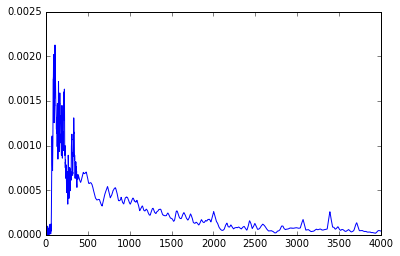

[  9.99307513e-01   6.85478677e-04   6.98462100e-06]
[RefPulse,AlphaCrys#11]
[  8.57838138e-04   9.99142170e-01]


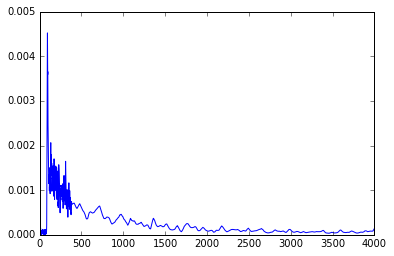

[  9.98941243e-01   1.05778268e-03   9.26900839e-07]
[RefPulse,AlphaCrys#11]
[  2.06320383e-05   9.99979377e-01]


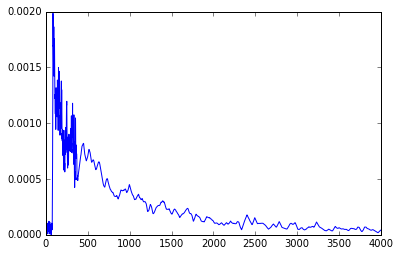

[  9.99931455e-01   5.46133015e-05   1.39740660e-05]
[RefPulse,AlphaCrys#11]
[ 0.14408147  0.85591847]


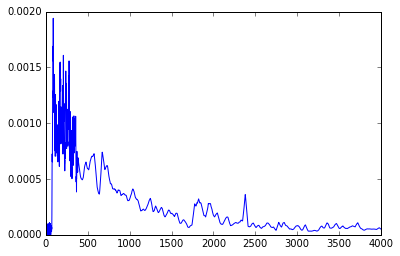

[  9.99931931e-01   7.28889108e-06   6.08413793e-05]
[RefPulse,AlphaCrys#11]
[ 0.62212336  0.3778767 ]


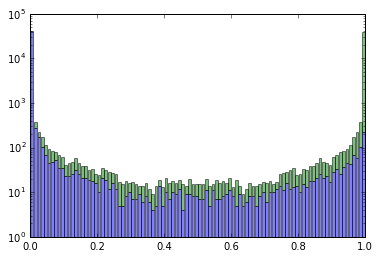

In [21]:
def differencer(x):
    y = x
    for i in range(len(x)):
        y[i] = y[i] - RefPul[0]
    return y

pmtall_diff = differencer(PMTALL) 
pmtall_d = np.expand_dims(pmtall_diff,axis=2)
preds2 = model2.predict(pmtall_d,batch_size=50,verbose=1)
x = np.arange(len(pmtall_d[1]))
dummy = 0
PMTALL = NORMPMTALL(pmtall,l)

for i in range(len(preds)):
    k = np.random.randint(len(preds))
    if indices[k] == 0:
        plt.figure()
        plt.plot(x,PMTALL[k])
        plt.show()
        print(preds[k])
        print("[RefPulse,AlphaCrys#11]")
        print(preds2[k])
        dummy += 1
    if dummy == 50:
        break
        
#     k = np.random.randint(len(PMTALL))
#     plt.figure()
#     plt.plot(x,pmtall[k])
#     plt.show()
#     print("entry =",k)
#     print("[RefPulse,AlphaCrys#11]")
#     print(preds[k])

plt.figure()
plt.hist(preds2,100,stacked=True,alpha=0.5)
plt.yscale("log")
plt.show()

# Note

We have no information about the data trained using the second part CNN. As it was reproduced based on the assumption that the data obtained corresponds to information provided by other people. How accurate in reallity I do not know. However This is a clear demonstration that there is information that the neural networks algorithm learns that is not obvious to us, where separatetion of this small discrepancy is possible.

# まとめ

Next plan, a further discrimination between gamma event --> Gamma and Beta events.

# How?

Gamma events, multiple "stacked" events occurs in a single crystal. Technically we can separate this with a much high freaquency DAQ system where the all starting events at the start can be clearly identify. However Mathematically there is a small difference between decaying slope. This is the key to solve this problem. However the signal we recieve to see this effect is extremely difficult due to the inherent noise in the signal itself. Mathematically to deduce this difference is difficult. Ideally if we can simulate the exact pulse shape for both events where we have perfect information of the signal source itself, In turn we can take this and train a ML model to distinguish the both of them.

# The Goal beyond

If we managed to prove this method to separate signal from the small difference. We can use this to further study other kinds physics events. such as inverse beta decay from neutrino captures events ->Solar Neutrinos or Geoneutrinos. 